# #Import Package

In [7]:
import pandas as pd
import os
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# #Data Gathering

In [8]:
#load the csv file in dataframe
twitter_df = pd.read_csv('twitter-archive-enhanced-2.csv')

In [9]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
twitter_df["source"].value_counts

<bound method IndexOpsMixin.value_counts of 0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
5       <a href="http://twitter.com/download/iphone" r...
6       <a href="http://twitter.com/download/iphone" r...
7       <a href="http://twitter.com/download/iphone" r...
8       <a href="http://twitter.com/download/iphone" r...
9       <a href="http://twitter.com/download/iphone" r...
10      <a href="http://twitter.com/download/iphone" r...
11      <a href="http://twitter.com/download/iphone" r...
12      <a href="http://twitter.com/download/iphone" r...
13      <a href="http://twitter.com/download/iphone" r...
14      <a href="http://twitter.com/download/iphone" r...
15      <a href="http://twitter.com/download/iphone" r...
16      <a href="http://twit

In [4]:
#save the url in string
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
#get the file name the last name in the url
file_name = url.split('/')[-1]

#use requests package to get the file
response = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name, mode='wb') as file:
        file.write(response.content)
image_prediction_df = pd.read_csv(file_name , sep="\t")

In [5]:
image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
api_df = pd.DataFrame(df_list)
api_df.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


# Assess Data 
1.visual 
2.programatic


In [7]:
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
image_prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
api_df

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


In [12]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [13]:
twitter_df.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
Daisy          7
an             7
Toby           7
Bailey         7
Buddy          7
Dave           6
Rusty          6
Milo           6
Bella          6
Koda           6
Scout          6
Jax            6
Oscar          6
Leo            6
Stanley        6
Jack           6
Finn           5
            ... 
Tove           1
Loomis         1
Kayla          1
Lilah          1
Hector         1
Harry          1
Rhino          1
Brandy         1
Maks           1
Glacier        1
Shelby         1
Liam           1
Willem         1
Ike            1
Trevith        1
Sonny          1
Cheesy         1
Dwight         1
Orion          1
Leonidas       1
Pavlov         1
Gerbald        1
Laela          1
Sully          1
Ralf           1
Torque         1
Tayzie         1
General       

In [14]:
twitter_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
twitter_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
twitter_df['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [17]:
twitter_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
twitter_df['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [19]:
image_prediction_df['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
teddy                         18
beagle                        18
Maltese_dog                   18
Eskimo_dog                    18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [20]:
image_prediction_df['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
chow                               20
miniature_pinscher                 20
Samoyed                            20
malinois                           20
toy_terrier                        20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [21]:
image_prediction_df['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
d

Quality issues

#1.Remove tweets in twitter_df and not in twitter_api_df
#2.convert tweet_id column type from int64 to object -string
#for twitter_df:
    #1.Convert timestamp to type datetime
    #2.Conver None value in the columns name, doggo, floofer pupper and puppo column
    #3.Inaccurate names in name
    #4.59 null values in expanded_urls column
    #5.data must be original no retweets so some column not needed like retweet and reply
    #6.unnecessary column like source hard to read
    #7.Inaccurate data in numerator column and dominator column
    #8.numerator column type int64
#for image_prediction_df:
    #1.has 2075 records need to be reflected in other dfs
    #2.Lower case for some of the predicted bread in the predected column (p1,p2,p3)

Tidiness Issues

#1.In twitter_df there are four columns (doggo, floofer pupper and puppo) which are values related to one variable
#2.In image_predictions_df the column names (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) not descriptive and need to be merged to three column because each 3 is values to one variable
#3.The two dataframes twitter_archive_df and api_df should merged in one dataframe because it is related to one observation

# Clean Data

In [22]:
#Make Copies
twitter_df_clean =twitter_df.copy()
image_prediction_df_clean=image_prediction_df.copy()
api_df_clean=api_df.copy()


#1.Remove tweets in twitter_df and not in twitter_api_df

# Define
Drop tweet_id in twitter_df that are not in api_df because they are missing tweets

#Code

In [23]:
twitter_df.shape

(2356, 17)

In [24]:
extra_tweet_df=twitter_df[~twitter_df['tweet_id'].isin(api_df['tweet_id'])]

In [25]:
extra_tweet_df.shape

(2, 17)

In [26]:
twitter_df_clean = twitter_df.drop(extra_tweet_df.index)

Test

In [27]:
twitter_df_clean.shape

(2354, 17)

#2.convert tweet_id column type from int64 to object -string

# Define
convert tweet_id in all the 3 df from int64 to str

Code 

In [28]:
twitter_df_clean.tweet_id = twitter_df_clean.tweet_id.astype(str)

Test

In [29]:
twitter_df_clean.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

Code

In [30]:
image_prediction_df_clean.tweet_id = image_prediction_df_clean.tweet_id.astype(str)

Test

In [31]:
image_prediction_df_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

Code

In [32]:
api_df_clean.tweet_id = api_df_clean.tweet_id.astype(str)

Test

In [33]:
api_df_clean.dtypes

favorite_count     int64
retweet_count      int64
tweet_id          object
dtype: object

# Define
convert timestamp column datatype from object to datetime

Code

In [34]:
twitter_df_clean.timestamp = pd.to_datetime(twitter_df_clean.timestamp)

Test

In [35]:
twitter_df_clean.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

Convert None value in the columns name, doggo, floofer pupper and puppo column


# Define¶
convert None value for the column name to np.nan

Code

In [36]:
twitter_df_clean.name.value_counts()

None         744
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Bailey         7
an             7
Buddy          7
Daisy          7
Toby           7
Stanley        6
Bella          6
Koda           6
Jack           6
Leo            6
Jax            6
Scout          6
Milo           6
Rusty          6
Oscar          6
Dave           6
Alfie          5
            ... 
Herb           1
Tove           1
Loomis         1
Kayla          1
Lilah          1
Ebby           1
Leonidas       1
Kanu           1
Dwight         1
Brandy         1
Glacier        1
Shelby         1
Liam           1
Willem         1
Ike            1
Trevith        1
Sonny          1
Cheesy         1
Maks           1
Charleson      1
Orion          1
Pavlov         1
Gerbald        1
Laela          1
Sully          1
Ralf           1
Torque         1
Tayzie        

In [37]:
twitter_df_clean['name'] = twitter_df_clean['name'].replace("None", np.nan)

Test

In [38]:
twitter_df_clean.name.value_counts()

a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Penny        10
Tucker       10
Lola         10
Bo            9
Winston       9
Sadie         8
the           8
Daisy         7
Toby          7
an            7
Buddy         7
Bailey        7
Oscar         6
Leo           6
Stanley       6
Dave          6
Bella         6
Jack          6
Milo          6
Rusty         6
Koda          6
Scout         6
Jax           6
Larry         5
very          5
             ..
Tove          1
Loomis        1
Kayla         1
Lilah         1
Hector        1
Harry         1
Rhino         1
Brandy        1
Maks          1
Glacier       1
Shelby        1
Liam          1
Willem        1
Ike           1
Trevith       1
Sonny         1
Cheesy        1
Dwight        1
Orion         1
Leonidas      1
Pavlov        1
Gerbald       1
Laela         1
Sully         1
Ralf          1
Torque        1
Tayzie        1
General       1
Charleson     1
Mona          1
Name: name, Length: 956,

# Define
convert "None" value for doggo, floofer pupper and puppo to '' to be able to merge in other point in tidness

Code

In [39]:
twitter_df_clean['doggo'].value_counts()

None     2257
doggo      97
Name: doggo, dtype: int64

In [40]:
twitter_df_clean['floofer'].value_counts()

None       2344
floofer      10
Name: floofer, dtype: int64

In [41]:
twitter_df_clean['pupper'].value_counts()

None      2098
pupper     256
Name: pupper, dtype: int64

In [42]:
twitter_df_clean['puppo'].value_counts()

None     2324
puppo      30
Name: puppo, dtype: int64

In [43]:
twitter_df_clean['doggo'] = twitter_df_clean['doggo'].replace('None', '')
twitter_df_clean['floofer'] = twitter_df_clean['floofer'].replace('None', '')
twitter_df_clean['pupper'] = twitter_df_clean['pupper'].replace('None', '')
twitter_df_clean['puppo'] = twitter_df_clean['puppo'].replace('None', '')

Test

In [44]:
twitter_df_clean['doggo'].value_counts()

         2257
doggo      97
Name: doggo, dtype: int64

In [45]:
twitter_df_clean['floofer'].value_counts()

           2344
floofer      10
Name: floofer, dtype: int64

In [46]:
twitter_df_clean['puppo'].value_counts()

         2324
puppo      30
Name: puppo, dtype: int64

In [47]:
twitter_df_clean['pupper'].value_counts()

          2098
pupper     256
Name: pupper, dtype: int64

convert inaccurate names in name

# Define¶
Convert the in accurate value name 'a' and 'an' by an accurate name extracted from the text column

Code

In [48]:
name_reg_expression = re.compile('(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')

In [49]:
for index,row in twitter_df_clean.iterrows():
    if row['name'] == 'a' or row['name'] == 'an':
        try:
            text_value = row['text']
            name_value=re.findall(name_reg_expression,text_value)[0]
            twitter_df_clean.loc[index,'name'] = twitter_df_clean.loc[index,'name'].replace('a', name_value)
            twitter_df_clean.loc[index,'name'] = twitter_df_clean.loc[index,'name'].replace('an', name_value)
        except IndexError:
            twitter_df_clean.loc[index,'name'] = np.nan

Test

In [50]:
twitter_df_clean.name.value_counts()

Charlie      12
Lucy         11
Cooper       11
Oliver       11
Penny        10
Lola         10
Tucker       10
Bo            9
Winston       9
Sadie         8
the           8
Daisy         7
Bailey        7
Buddy         7
Toby          7
Leo           6
Jax           6
Stanley       6
Koda          6
Bella         6
Dave          6
Jack          6
Rusty         6
Milo          6
Oscar         6
Scout         6
Gus           5
Chester       5
Sammy         5
Bentley       5
             ..
Herb          1
Tove          1
Loomis        1
Kayla         1
Lilah         1
Izzy          1
Ebby          1
Rhino         1
Maks          1
Glacier       1
Shelby        1
Liam          1
Willem        1
Ike           1
Trevith       1
Sonny         1
Cheesy        1
Dwight        1
Orion         1
Leonidas      1
Pavlov        1
Gerbald       1
Laela         1
Sully         1
Ralf          1
Torque        1
Tayzie        1
General       1
Charleson     1
Buckley       1
Name: name, Length: 972,

Drop unnecessary column
#need orginal tweet so drop columns of retweet and reply
#source hard to read and will be merge with api_df

# Define
#Drop retweet and reply to be more accurate
#Drop source because it's hard to read

Code

In [51]:
twitter_df_clean.columns.values

array(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

In [52]:
twitter_df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

In [53]:
twitter_df_clean.drop('source',axis=1,inplace=True)

Test

In [54]:
twitter_df_clean.columns.values

array(['tweet_id', 'timestamp', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo',
       'floofer', 'pupper', 'puppo'], dtype=object)

convert numerator type to float and re-extract it from the text value as there is some inaccurate data

# Define
convert numerator type to float and re-extract it from the text value as there is some inaccurate data

Code

In [55]:
numenator_reg_expression = '(\d+\.?\d?\d?)\/\d{1,3}'

In [56]:
twitter_df_clean['rating_numerator'] = twitter_df_clean.text.str.extract(numenator_reg_expression, expand = False).astype('float')

Test

In [57]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2354 non-null object
timestamp             2354 non-null datetime64[ns]
text                  2354 non-null object
expanded_urls         2295 non-null object
rating_numerator      2354 non-null float64
rating_denominator    2354 non-null int64
name                  1569 non-null object
doggo                 2354 non-null object
floofer               2354 non-null object
pupper                2354 non-null object
puppo                 2354 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 300.7+ KB


Denominator column has inaccurate data it must be equal 10

# Define
Correct rating_denominator values (denominator should equal 10)

Code

In [58]:
twitter_df_clean.loc[twitter_df_clean['rating_denominator'] !=10, 'rating_numerator' ]=10 * twitter_df_clean['rating_numerator'] /twitter_df_clean['rating_denominator']
twitter_df_clean.loc[twitter_df_clean['rating_denominator'] !=10, 'rating_denominator' ]= 10

Test

In [59]:
twitter_df_clean.rating_denominator.value_counts()

10    2354
Name: rating_denominator, dtype: int64

image_prediction_df has 2075 records which need to be reflected in the other df


# Define
Drop rows from twitter_archive_df with tweet_id that not in image_predictions_df and rows from image_predictions_df that not in twitter_archive_df

Code

In [60]:
extra_tweet_df=twitter_df_clean[~twitter_df_clean['tweet_id'].isin(image_prediction_df_clean['tweet_id'])]

In [61]:
extra_tweet_df.shape

(281, 11)

In [62]:
extra_image_prediction_df = image_prediction_df_clean[ ~ image_prediction_df_clean['tweet_id'].isin(twitter_df_clean['tweet_id'])]


In [63]:
extra_image_prediction_df.shape

(2, 12)

In [64]:
twitter_df_clean = twitter_df_clean.drop(extra_tweet_df.index)

In [65]:
image_prediction_df_clean = image_prediction_df_clean.drop(extra_image_prediction_df.index)

Test

In [66]:
twitter_df_clean.shape

(2073, 11)

In [67]:
image_prediction_df_clean.shape

(2073, 12)

Lower case for some of the predicted bread in the predected column (p1,p2,p3)
Make all names capitals

# Define
Change values for p1 , p2, p3 column to be capitalized

Code

In [68]:
image_prediction_df_clean['p1'] = image_prediction_df_clean['p1'].str.capitalize()
image_prediction_df_clean['p2'] = image_prediction_df_clean['p2'].str.capitalize()
image_prediction_df_clean['p3'] = image_prediction_df_clean['p3'].str.capitalize()

In [15]:
Test

NameError: name 'Test' is not defined

Test

In [69]:
image_prediction_df_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Tidiness Issues

In twitter_archive_df there are four columns (doggo, floofer pupper and puppo) which are values related to one variable

# Define
Combine the four columns (doggo, floofer pupper and puppo) in one column and named it dog_bread

Code

In [70]:
twitter_df_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [71]:
twitter_df_clean['dog_stage'] = twitter_df_clean['doggo'] + twitter_df_clean['floofer'] + twitter_df_clean['pupper'] + twitter_df_clean['puppo']

In [72]:
twitter_df_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_stage'],
      dtype='object')

In [73]:
twitter_df_clean['dog_stage'].value_counts()

                1753
pupper           210
doggo             67
puppo             23
doggopupper       11
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [74]:
twitter_df_clean['dog_stage'] = twitter_df_clean['dog_stage'].replace('', np.nan)

In [75]:
twitter_df_clean['dog_stage'].value_counts()

pupper          210
doggo            67
puppo            23
doggopupper      11
floofer           7
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

In [76]:
twitter_df_clean[twitter_df_clean['dog_stage'] =="doggopupper"]="mixed"
twitter_df_clean[twitter_df_clean['dog_stage'] =="doggopuppo"]="mixed"
twitter_df_clean[twitter_df_clean['dog_stage'] =="doggofloofer"]="mixed"

In [77]:
twitter_df_clean = twitter_df_clean.drop(['doggo','puppo','pupper','floofer' ], axis=1)

Test

In [79]:
twitter_df_clean['dog_stage'].value_counts()

pupper     210
doggo       67
puppo       23
mixed       13
floofer      7
Name: dog_stage, dtype: int64

In [82]:
twitter_df_clean.columns

array(['tweet_id', 'timestamp', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'], dtype=object)

In image_predictions_df the column names (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) not descriptive and need to be merged to three column because each 3 is values to one variable

# Define
Rename the 9 column ('tweet_id', 'jpg_url', 'img_num','propability_1', 'confidence_1', 'dog_1','propability_2', 'confidence_2', 'dog_2','propability_3', 'confidence_3', 'dog_3') to be more describtive and merge them nto 3 columns 'propability', 'confidence', 'dog'

Code

In [84]:
image_prediction_df_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [85]:
columns_name_list = ['tweet_id', 'jpg_url', 'img_num','propability_1', 'confidence_1', 'dog_1','propability_2', 'confidence_2', 'dog_2','propability_3', 'confidence_3', 'dog_3']

In [86]:
image_prediction_df_clean.columns = columns_name_list

In [88]:
image_prediction_df_clean = pd.wide_to_long(image_prediction_df_clean, stubnames=['propability', 'confidence', 'dog'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='propability_stage', sep="_").reset_index()

In [89]:
image_prediction_df_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'propability_stage', 'propability',
       'confidence', 'dog'],
      dtype='object')

Test

In [90]:
image_prediction_df_clean.head()

,tweet_id,jpg_url,img_num,propability_stage,propability,confidence,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,Collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,Redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,Miniature_pinscher,0.074192,True


The two dataframes twitter_archive_df and twitter_api_df should merged in one dataframe because it is related to one observation


# Define
Merge twitter_archive_df_clean and twitter_api_df_clean into twitter_archive_master_clean df because the two related to the same observation

Code

In [91]:
api_df_clean.shape

(2354, 3)

In [92]:
twitter_df_clean.shape

(2073, 8)

In [93]:
twitter_clean = pd.merge(twitter_df_clean, api_df_clean, on = 'tweet_id', how = 'inner')

In [94]:
twitter_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'favorite_count',
       'retweet_count'],
      dtype='object')

Test

In [95]:
twitter_clean.shape

(2060, 10)

In [96]:
twitter_clean.to_csv("twitter_report.csv",index=False)
image_prediction_df_clean.to_csv("images_report.csv",index=False)

# Analysis and Visualisation

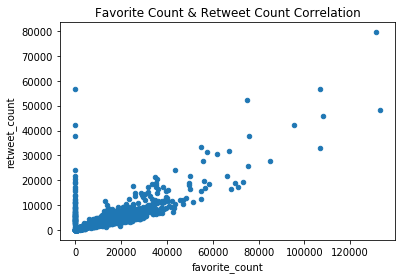

In [97]:
twitter_clean.plot.scatter("favorite_count", "retweet_count", title="Favorite Count & Retweet Count Correlation");

From graph we can notice that there are positive relationship between retweet and favorite

In [99]:
twitter_clean['dog_stage'].value_counts()

pupper     210
doggo       67
puppo       23
floofer      7
Name: dog_stage, dtype: int64

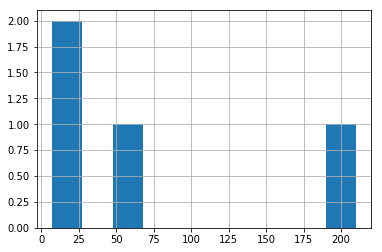

In [100]:
twitter_clean['dog_stage'].value_counts().hist()

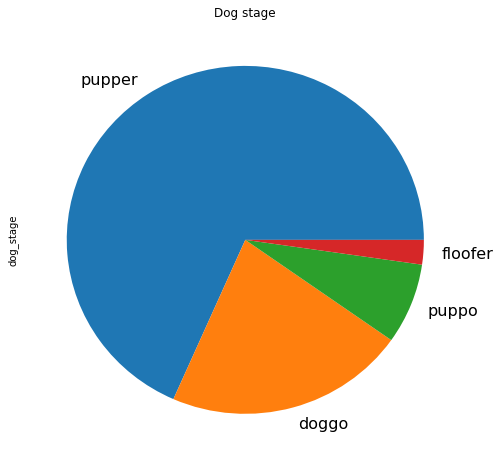

In [101]:
twitter_clean['dog_stage'].value_counts().plot(title="Dog stage",fontsize="16",kind='pie', figsize=(8,8))

In [102]:
twitter_clean.groupby(['dog_stage']).retweet_count.mean().sort_values()

dog_stage
pupper     2468.209524
floofer    4968.714286
puppo      6431.434783
doggo      7901.552239
Name: retweet_count, dtype: float64

In [103]:
dog_retweet_mean = twitter_clean.groupby(['dog_stage']).retweet_count.mean().sort_values()

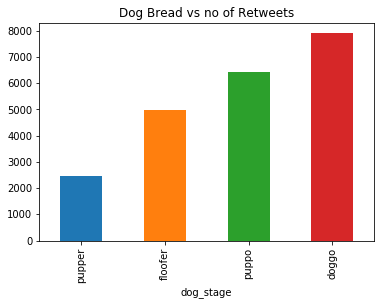

In [104]:
dog_retweet_mean.plot(kind='bar', title="Dog Bread vs no of Retweets")

from the two graphs above , we can noticed that the dog bread that got the higher retweets is duggo

In [105]:
twitter_clean.groupby(['dog_stage']).favorite_count.mean().sort_values()

dog_stage
pupper      6957.814286
floofer    13206.000000
doggo      18200.776119
puppo      20643.739130
Name: favorite_count, dtype: float64

In [106]:
dog_favorite_mean = twitter_clean.groupby(['dog_stage']).favorite_count.mean().sort_values()

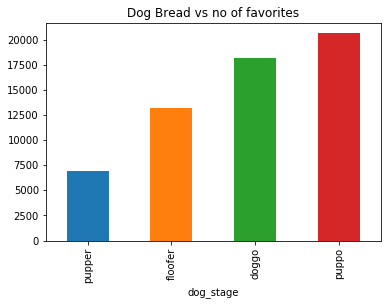

In [107]:
dog_favorite_mean.plot(kind='bar', title="Dog Bread vs no of favorites")

from the two graphs above , we can noticed that the dog bread that got the higher favorites is puppo

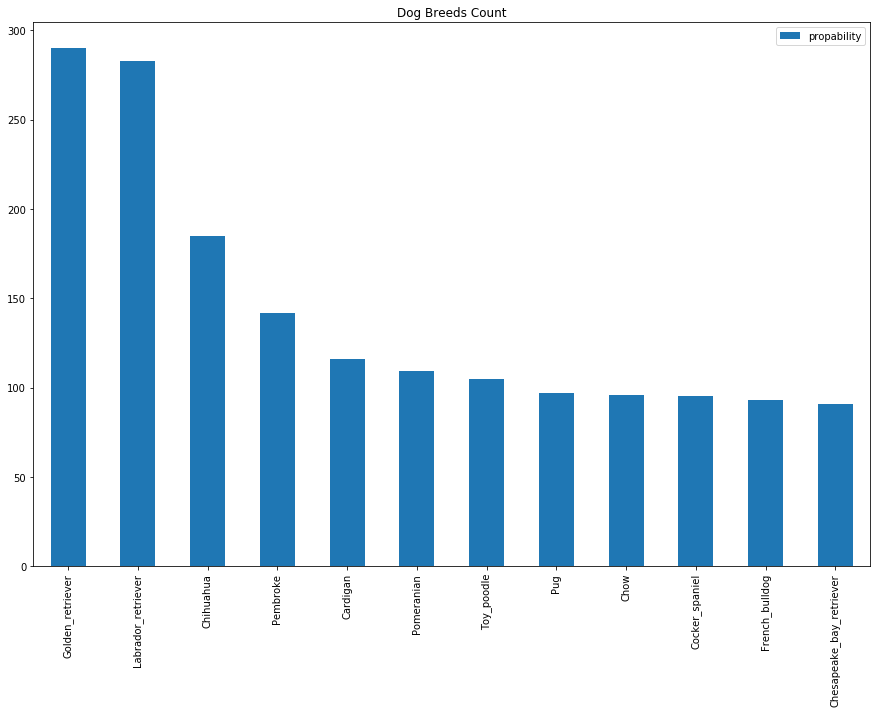

In [111]:
pd.DataFrame(image_prediction_df_clean["propability"].value_counts()).nlargest(12, "propability").plot(kind="bar", title="Dog Breeds Count", figsize=(15,10));

from the above graph we can noticed that the dog bread related to highest propability is labrador retriever

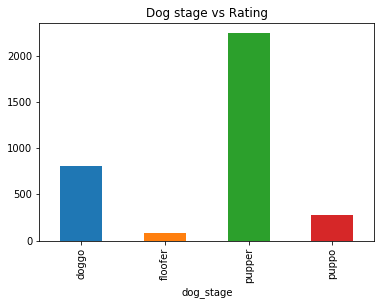

In [113]:
twitter_clean.groupby(['dog_stage']).rating_numerator.sum().plot(kind="bar", title="Dog stage vs Rating")

In [114]:
From the above graph we can noticed that the Dog stage that got the heighest no of rating is pupper

SyntaxError: invalid syntax (<ipython-input-114-f6edb82a6638>, line 1)